In [2]:
suppressPackageStartupMessages({
    library(ggplot2)
    library(ggsci)
    library(SingleCellExperiment)
    library(Matrix)
    set.seed(1)
    library(dplyr)
    })

# Tirosh dataset
This data set is downloaded from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE72056.
The annotation 'txt' file can also be found from this website.

In [3]:
# data = read.csv('/project/CorrAnalysis/02.Projects/data/rawdata/Tirosh_GSE72056_melanoma_single_cell_revised_v2.txt', sep = '\t')
data = read.csv('./download_raw_data_scripts/Tirosh_GSE72056_melanoma_single_cell_revised_v2.txt', sep = '\t')

In [4]:
head(data)

,Cell,Cy72_CD45_H02_S758_comb,CY58_1_CD45_B02_S974_comb,Cy71_CD45_D08_S524_comb,Cy81_FNA_CD45_B01_S301_comb,Cy80_II_CD45_B07_S883_comb,Cy81_Bulk_CD45_B10_S118_comb,Cy72_CD45_D09_S717_comb,Cy74_CD45_A03_S387_comb,Cy71_CD45_B05_S497_comb,⋯,CY75_1_CD45_CD8_7__S265_comb,CY75_1_CD45_CD8_3__S127_comb,CY75_1_CD45_CD8_1__S61_comb,CY75_1_CD45_CD8_1__S12_comb,CY75_1_CD45_CD8_1__S25_comb,CY75_1_CD45_CD8_7__S223_comb,CY75_1_CD45_CD8_1__S65_comb,CY75_1_CD45_CD8_1__S93_comb,CY75_1_CD45_CD8_1__S76_comb,CY75_1_CD45_CD8_7__S274_comb
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,tumor,72.0000,58.0000,71.0000,81.0000,80.0000,81.0000,72.0000,74.0000,71.0000,⋯,75,75.0000,75.0000,75.00000,75.0000,75.0000,75.0000,75.0000,75.000,75.0000
2,"malignant(1=no,2=yes,0=unresolved)",1.0000,1.0000,2.0000,2.0000,2.0000,2.0000,1.0000,1.0000,2.0000,⋯,1,1.0000,1.0000,1.00000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000
3,"non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)",2.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,⋯,1,1.0000,1.0000,1.00000,1.0000,1.0000,1.0000,1.0000,1.000,0.0000
4,C9orf152,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,⋯,0,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
5,RPS11,9.2172,8.3745,9.3130,7.8876,8.3291,7.8336,8.3737,8.1338,8.4373,⋯,0,7.8639,5.8505,0.62639,6.2734,5.4889,4.9262,7.0958,3.997,3.9897
6,ELMO2,0.0000,0.0000,2.1263,0.0000,0.0000,0.7740,0.0000,0.0000,0.0000,⋯,0,0.0000,3.1572,4.79320,0.0000,0.0000,5.5296,0.0000,0.000,0.0000


In [5]:
ridx = !duplicated(data[,1])
sum(ridx)

[1] 23687

In [6]:
dupid = which(duplicated(data[,1]))
data[dupid, 1] = paste0(data[dupid,1], '.1')

In [7]:
ridx = !duplicated(data[,1])
sum(ridx)

[1] 23689

In [8]:
rownames(data) = data[,1]
idx = as.character(data[3,]) %in% as.character(c(1,2,3,4,5,6))
subdata = data[, idx]
subdata = as.matrix(subdata)
dim(subdata)

[1] 23689  2887

In [9]:
values = c('T', 'B', 'Macro', 'Endo', 'CAF', 'NK')
celltypes = values[as.factor(subdata[3,])]
subdata = subdata[4:nrow(subdata), ]

In [12]:

sce <- SingleCellExperiment(list(counts=subdata),
    colData=DataFrame(cells = colnames(subdata), truth = celltypes),
    metadata=list(study="GSE72056")
)
dim(sce)

[1] 23686  2887

In [11]:
sce

class: SingleCellExperiment 
dim: 23686 2887 
metadata(1): study
assays(1): counts
rownames(23686): C9orf152 RPS11 ... CTSC AQP7
rowData names(0):
colnames(2887): Cy72_CD45_H02_S758_comb CY58_1_CD45_B02_S974_comb ...
  CY75_1_CD45_CD8_1__S93_comb CY75_1_CD45_CD8_1__S76_comb
colData names(2): cells truth
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [159]:
saveRDS(sce, './reak_data/raw/Tirosh_nonmaglignant.rds')

# PBMC10x data
This data set is downloaded from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE1320444, the corresponding 'txt' files used below can also be downloaded from this website.

In [13]:
# mat = readMM('/project/CorrAnalysis/02.Projects/data/rawdata/PBMC/counts.read.txt')
mat = readMM('download_raw_data_scripts/PBMC/counts.read.txt')

In [14]:
# genes = read.table('/project/CorrAnalysis/02.Projects/data/rawdata/PBMC/genes.read.txt', sep = '\t')
genes = read.table('download_raw_data_scripts//PBMC/genes.read.txt', sep = '\t')
# cells = read.csv('/project/CorrAnalysis/02.Projects/data/rawdata/PBMC/meta.counts.new.txt', sep = '\t')
cells = read.csv('download_raw_data_scripts//PBMC/meta.counts.new.txt', sep = '\t')


In [15]:
dim(mat)
dim(genes)
dim(cells)
head(cells)

[1] 33694 45017

[1] 33694     1

[1] 45017     4

,Name,Experiment,Method,CBC
,<chr>,<chr>,<chr>,<chr>
1,pbmc1_SM2_Cell_1,pbmc1,Smart-seq2,NA
2,pbmc1_SM2_Cell_107,pbmc1,Smart-seq2,NA
3,pbmc1_SM2_Cell_108,pbmc1,Smart-seq2,NA
4,pbmc1_SM2_Cell_115,pbmc1,Smart-seq2,NA
5,pbmc1_SM2_Cell_125,pbmc1,Smart-seq2,NA
6,pbmc1_SM2_Cell_128,pbmc1,Smart-seq2,NA


In [16]:
rownames(mat) = genes$V1
colnames(mat) = cells$Name

In [17]:
# meta = read.csv('/project/CorrAnalysis/02.Projects/data/rawdata/PBMC/meta.txt', sep = '\t')
meta = read.csv('download_raw_data_scripts//PBMC/meta.txt', sep = '\t')
meta = meta[2:nrow(meta),]
submat = mat[,colnames(mat) %in% meta$NAME]

In [18]:
dim(submat)
dim(meta)
head(meta)

[1] 33694 31021

[1] 31021     8

,NAME,nGene,nUMI,percent.mito,Cluster,CellType,Experiment,Method
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,pbmc1_SM2_Cell_108,2200,437125,0.0297434465355702,0,Cytotoxic T cell,pbmc1,Smart-seq2
3,pbmc1_SM2_Cell_115,2438,335596,0.0311521658159055,0,Cytotoxic T cell,pbmc1,Smart-seq2
4,pbmc1_SM2_Cell_133,1874,302204,0.0431128105727693,0,Cytotoxic T cell,pbmc1,Smart-seq2
5,pbmc1_SM2_Cell_142,2480,377420,0.0260323569927476,0,Cytotoxic T cell,pbmc1,Smart-seq2
6,pbmc1_SM2_Cell_143,2196,385514,0.0404759383962183,0,Cytotoxic T cell,pbmc1,Smart-seq2
7,pbmc1_SM2_Cell_144,2216,304994,0.023409951391094,0,Cytotoxic T cell,pbmc1,Smart-seq2


In [19]:
meta$Sample = paste0(meta$Experiment, '_', meta$Method)
samples = unique(meta$Sample)
meta$truth= meta$CellType
# for(i in samples){
#     idx = meta$Sample == i
#     data = submat[,idx]
#     sce = SingleCellExperiment(list(counts= data),
#     colData= meta[idx,],
#     metadata=list(study = i))
#     saveRDS(sce, paste0(i, '.rds'))
# }

In [20]:
samples

[1] "pbmc1_Smart-seq2"          "pbmc1_CEL-Seq2"           
 [3] "pbmc1_10x Chromium (v2) A" "pbmc1_10x Chromium (v2) B"
 [5] "pbmc1_10x Chromium (v3)"   "pbmc1_Drop-seq"           
 [7] "pbmc1_Seq-Well"            "pbmc1_inDrops"            
 [9] "pbmc2_Smart-seq2"          "pbmc2_CEL-Seq2"           
[11] "pbmc2_10x Chromium (v2)"   "pbmc2_Drop-seq"           
[13] "pbmc2_Seq-Well"            "pbmc2_inDrops"

In [21]:
idx = meta$Sample == "pbmc2_10x Chromium (v2)"
data = submat[,idx]
   

In [109]:
# genesymbldf = stringr::str_split(rownames(data), '_', simplify = T)
# head(genesymbldf[!(genesymbldf[,4] == ''),])

In [22]:
genesymbl =  stringr::word(rownames(data), 2 ,  -1, sep = '_' )
length(genesymbl)
length(unique(genesymbl))

[1] 33694

[1] 33660

In [23]:
genembl = stringr::word(rownames(data), 1 ,  2, sep = '_' )
length(genembl)
length(unique(genembl))

[1] 33694

[1] 33694

In [24]:
rownames(data) = genembl
sce = SingleCellExperiment(list(counts= data),
colData= meta[idx,],
metadata=list(study = "pbmc_10x Chromium"))

saveRDS(sce, './real_data/raw/data/PBMC_10X.rds')

## Tabula_sapiens endothelial

In [25]:
# data = readRDS('/proect/CAclust/data/tabula_sapiens/tabula_sapiens/tabula_sapiens_endothelial.rds')
data = readRDS('download_raw_data_scripts//tabula_sapiens_endothelial.rds')

In [26]:
data

Loading required package: Seurat

Warning message in fun(libname, pkgname):
“rgeos: versions of GEOS runtime 3.10.3-CAPI-1.16.1
and GEOS at installation 3.7.2-CAPI-1.11.2differ”
Attaching SeuratObject

Attaching sp


Attaching package: ‘Seurat’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays




An object of class Seurat 
58559 features across 32701 samples within 1 assay 
Active assay: RNA (58559 features, 0 variable features)
 4 dimensional reductions calculated: pca, scvi, scvi_umap, umap

In [27]:
unique(data@meta.data$cell_ontology_class)
unique(data@meta.data$cell_type)
unique(data@meta.data$tissue)
unique(data@meta.data$manually_annotated)

[1] endothelial cell of hepatic sinusoid  endothelial cell                     
 [3] endothelial cell of lymphatic vessel  vein endothelial cell                
 [5] endothelial cell of artery            capillary endothelial cell           
 [7] retinal blood vessel endothelial cell cardiac endothelial cell             
 [9] endothelial cell of vascular tree     gut endothelial cell                 
[11] bronchial vessel endothelial cell     vein or capillary endothelial cell   
[13] artery endothelial cell               lymphatic endothelial cells          
[15] capillary aerocyte                    lung microvascular endothelial cell  
16 Levels: artery endothelial cell ... vein or capillary endothelial cell

[1] endothelial cell of hepatic sinusoid  endothelial cell                     
 [3] endothelial cell of lymphatic vessel  vein endothelial cell                
 [5] endothelial cell of artery            capillary endothelial cell           
 [7] retinal blood vessel endothelial cell cardiac endothelial cell             
 [9] endothelial cell of vascular tree     gut endothelial cell                 
[11] blood vessel endothelial cell         lung microvascular endothelial cell  
12 Levels: blood vessel endothelial cell ... vein endothelial cell

[1] liver                  trachea                lymph node            
 [4] saliva-secreting gland spleen                 tongue                
 [7] mammary gland          uterus                 eye                   
[10] adipose tissue         skin of body           heart                 
[13] pancreas               prostate gland         muscle tissue         
[16] thymus                 large intestine        lung                  
[19] small intestine        vasculature            bladder organ         
[22] kidney                
22 Levels: adipose tissue bladder organ eye heart kidney ... vasculature

[1] TRUE

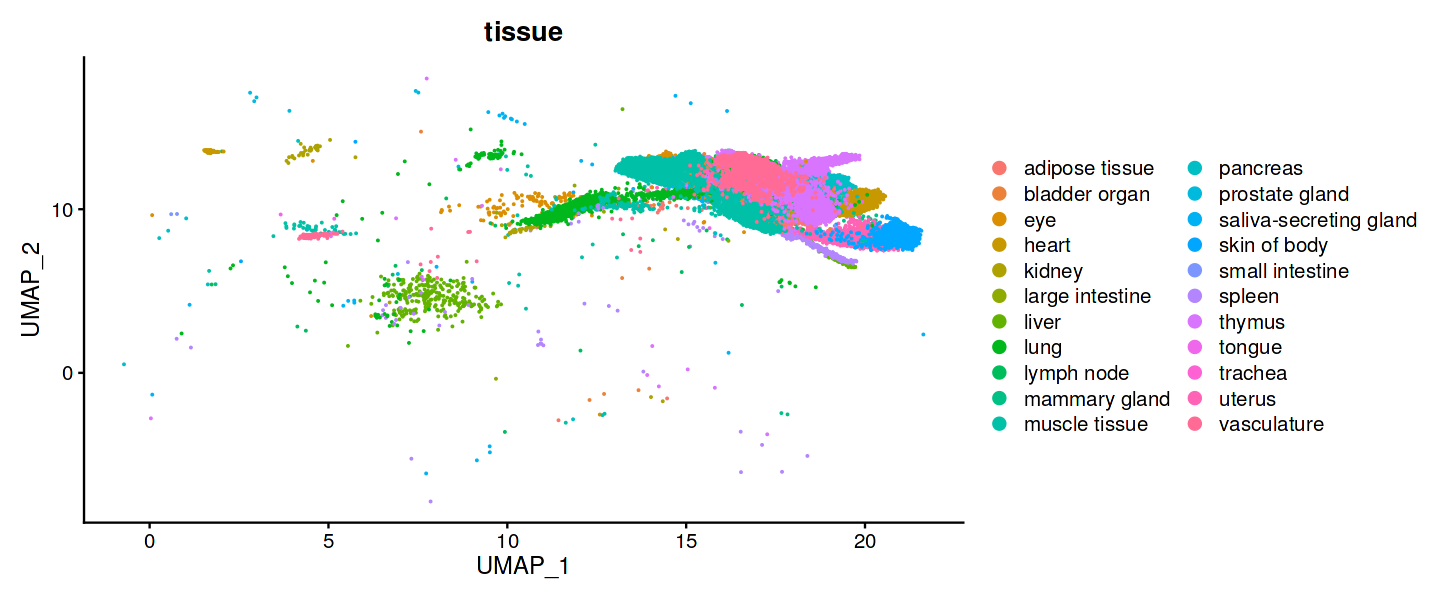

In [28]:
options(repr.plot.width=12, repr.plot.height=5)
DimPlot(data, group.by = 'tissue', reduction = 'umap')

In [29]:
data@meta.data$truth = data@meta.data$tissue
# head(data)

In [180]:
saveRDS(data, './real_data//raw/tabula_sapiens_tissue.rds')

## DmelSpatial data

In [30]:
# data = readRDS('/project/CorrAnalysis/02.Projects/ClusteringMtd/02.outputs/03.Spatial/E14-16h/E14-16h_raw_sce.rds')
data = readRDS('download_raw_data_scripts/E14-16h_raw_sce.rds')
data

class: SingleCellExperiment 
dim: 13668 15295 
metadata(1): study
assays(1): counts
rownames(13668): 128up 14-3-3epsilon ... zyd zye
rowData names(0):
colnames(15295): E14-16h_a_S01_20500x62780-0
  E14-16h_a_S01_20500x62800-0 ... E14-16h_a_S16_61760x79380-15
  E14-16h_a_S16_61760x79400-15
colData names(7): slice_ID raw_x ... new_z annotation
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [31]:
colData(data)$truth = colData(data)$annotation
saveRDS(data, 'real_data//raw/dmel_E14-16h.rds')

## check rownames

In [181]:
# files = list.files('/project/CAclust/data/CAbiNET_benchmarking_data/data/', pattern = '*.rds', full.names = T)
# for (file in files){
#     data = readRDS(file)
#     print(file)
#     print(head(rownames(data)))
# }

## check size of preprocessed datasets

In [1]:
# files = list.files('real_data//preprocessed', pattern = '.rds', full.names = T)
# df = data.frame()
# for (file in files){

#     # file = list.files(datadir, '*.rds', full.name = T)
    
#     if (!(length(file) == 0)){
#         dataset = stringr::word(datadir, -1, -1,'/')
#         data = readRDS(file)
#         df = rbind(df, data.frame(dataset = dataset, 
#                                   ngene = dim(data)[1], 
#                                   ncell = dim(data)[2]))
#         }
# }
# df = df[order(df$ncell),]
# df